In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import h5py

import DMsimulator as DMsim
import DMerror as DMerr


In [2]:

#########* Constants and fixed parameters of the model
const_dict = {
        "F0": 1.5e15,           # cm^-2
        "S0": 3e13,             # cm^-2
        
        "R": 0.00831442,        # kJ/mol*K
        "kBoltz": 1.380649e-23, # J/K
}

#########* Steric factors reactions
steric_dict = {
        ###* Atomic oxygen
        "SF_O_F": 1.0, "SF_O_S": 1.0, "SF_O_SO": 1.0, "SF_O_FO": 1.0,
        "SF_FO_S": 1.0, "SF_FO_SO": 1.0, "SF_FO_FO": 1.0, "SF_FO": 1.0,
        
        ###* Molecular oxygen
        "SF_O2_F": 1.0, "SF_O2_FO": 1.0, "SF_O2_FO2": 1.0, "SF_O_FO2": 1.0,
        "SF_FO2_FO": 1.0, "SF_FO_FO2": 1.0, "SF_FO2": 1.0,
        
        ###* Metastable species
        "SF_O2fast_SO": 0.0, "SF_Ofast_SO": 0.0, "SF_O2fast_S": 0.0,  "SF_Ofast_S": 0.0,
        "SF_Ofast_Sdb": 0.0, "SF_Ofast_SOdb": 0.0, "SF_O2fast_Sdb": 0.0, "SF_O2fast_SOdb": 0.0,
        "SF_O_Sdb": 0.0, "SF_O_SOdb": 0.0, "SF_FO_SOdb": 0.0, "SF_FO_Sdb": 0.0,
}

#########* Energy barriers  --  Based Model
energy_dict = { # kJ/mol and s^-1
        "E_O_F": 0.0, "E_O_S": 0.0, "E_O_SO": 15.0, "E_O_FO": 0.0, 
        "E_FO_SO": 20.0, "E_FO_FO":0.0, "E_di_O": 15.0, "E_de_O": 30.0,
        
        "E_O2_F": 0.0, "E_O2_FO": 0.0, "E_O2_FO2": 0.0, "E_O_FO2": 0.0, 
        "E_FO2_FO": 0.0, "E_FO_FO2": 0.0, "E_di_O2": 15.0, "E_de_O2": 17.5,
        
        "E_O2fast_SO": 0.0, "E_O2fast_S": 0.0, "E_O2fast_SOdb": 0.0, "E_O2fast_Sdb": 0.0, "E_Ofast_Sdb": 0.0,
        "E_Ofast_SOdb": 0.0, "E_O_Sdb": 0.0, "E_O_SOdb": 0.0, "E_F_SOdb": 0.0, "E_FO_SOdb": 0.0,
        "ED_db": 14.999,
        
        "nu_D": 1.0e13, "nu_d": 1.0e15,
        "Emin": 2.90, # eV
        "Ealpha": 3400.0, # K

}

file_input_data = "Experimental_data_Paper.hdf5"

In [3]:
system  = DMerr.ErrorPropagation(const_dict, steric_dict, energy_dict, file_input_data)

In [4]:
print(system.input_data_dict)

[{'Tnw': 262.53133733208, 'Tw': 253.14999999999998, 'O_den': 1493906152913230.0, 'pressure': 0.4, 'FluxIon': 2000000000000000.0, 'EavgMB': 0.87, 'current': 20.0, 'N_den': 1.34810445111836e+16}
 {'Tnw': 265.49039366168, 'Tw': 253.14999999999998, 'O_den': 2482489172052840.0, 'pressure': 0.6, 'FluxIon': 2000000000000000.0, 'EavgMB': 0.77, 'current': 20.0, 'N_den': 1.9502568519941e+16}
 {'Tnw': 268.28248792299996, 'Tw': 253.14999999999998, 'O_den': 3044362383817350.0, 'pressure': 0.8, 'FluxIon': 2000000000000000.0, 'EavgMB': 0.4667333333333333, 'current': 20.0, 'N_den': 2.51593341846723e+16}
 {'Tnw': 276.84558188536, 'Tw': 253.14999999999998, 'O_den': 4814831897137840.0, 'pressure': 1.5, 'FluxIon': 2000000000000000.0, 'EavgMB': 0.001, 'current': 20.0, 'N_den': 4.29026203257012e+16}
 {'Tnw': 281.93841257599996, 'Tw': 253.14999999999998, 'O_den': 5660345640080320.0, 'pressure': 2.0, 'FluxIon': 2000000000000000.0, 'EavgMB': 0.001, 'current': 20.0, 'N_den': 5.42805831351074e+16}
 {'Tnw': 290.0

In [5]:

std_input_ratios_dict = {
    'Tnw': 0.15,
    'O_den': 0.15,
    'N_den': 0.15
}

prob_dist_vector = system.sampler_error_propagation(std_input_ratios_dict, n_samples=500)

  0%|          | 0/33000 [00:00<?, ?it/s]

100%|██████████| 33000/33000 [03:37<00:00, 151.49it/s]


In [6]:
print(prob_dist_vector.shape)

std_vector = np.std(prob_dist_vector, axis=1)
mean_vector = np.mean(prob_dist_vector, axis=1)
input_data = system.input_data_dict

print(mean_vector)
print(std_vector)

(66, 500)
[0.00083211 0.00129588 0.00159714 0.00255648 0.00305081 0.00348036
 0.00087567 0.00144111 0.00178601 0.00226335 0.00292814 0.0034427
 0.00413816 0.00475825 0.00500131 0.00029122 0.00041433 0.00048677
 0.00057544 0.00074188 0.00085936 0.00104557 0.00117816 0.00031584
 0.00044705 0.00055997 0.00066555 0.00084935 0.00098457 0.00119907
 0.00139947 0.00152622 0.00023095 0.00026309 0.00029966 0.0003357
 0.00040419 0.0004433  0.00051641 0.00058284 0.00024702 0.00028983
 0.00033876 0.00036912 0.00043939 0.00050297 0.00059397 0.00076468
 0.00083329 0.00026574 0.00028555 0.00029327 0.00032012 0.00034349
 0.00037116 0.00042213 0.00048781 0.00028284 0.0002957  0.00031102
 0.00034668 0.00038426 0.0004296  0.00050622 0.00060284 0.00075271]
[1.44884769e-04 2.13310117e-04 2.57738303e-04 3.79891637e-04
 4.54467313e-04 5.16150487e-04 1.41125199e-04 2.31329210e-04
 2.83083720e-04 3.60552558e-04 4.74900855e-04 5.05145761e-04
 6.26476967e-04 6.82378245e-04 7.11878858e-04 8.90332453e-05
 1.1265177

In [7]:
with h5py.File('simulations/results_PaperBase.hdf5', 'r') as f:
    
    exp_data = f['exp_data'][:]
    gammas_data = f['gammas_data'][:]
    gammas_names = f['gammas_names'][:].astype(str)
    exp_names = f['exp_names'][:].astype(str)
    recProbExp = f['recProbExp'][:]
    
    f.close()


Tnw_vec = exp_data[:, 0]
Tw_vec = exp_data[:, 1]
pressure_vec = exp_data[:, 3]
current_vec = exp_data[:, 4]
gammas_exp_vec = recProbExp

pair:  [262.53133733 265.49039366 268.28248792 276.84558189 281.93841258
 290.0677226  269.53534743 273.34686625 276.98517131 280.45629675
 288.44229854 295.51542442 307.3001819  324.063654   340.03504125]
pair:  [286.80208631 289.44956301 291.95269446 294.31804697 299.67173672
 304.30794586 311.838316   322.8036195  293.41748159 296.87130715
 300.20619241 303.42525776 310.98668654 317.89249933 329.93230117
 348.2897795  364.53001706]
pair:  [305.36649745 308.13522322 310.73354675 313.16971083 318.60476684
 323.20663754 330.42599782 340.533418   311.72120783 315.15240639
 318.48539091 321.72192152 329.40281316 336.51937104 349.1694944
 368.907834   385.42111662]
pair:  [327.53090967 330.42088502 333.11440112 335.62137727 341.13780073
 345.70533414 352.61368704 361.8632305  333.624809   337.03343153
 340.36455854 343.61859037 351.41900578 358.74633383 372.00674932
 393.1257681  409.91221146]


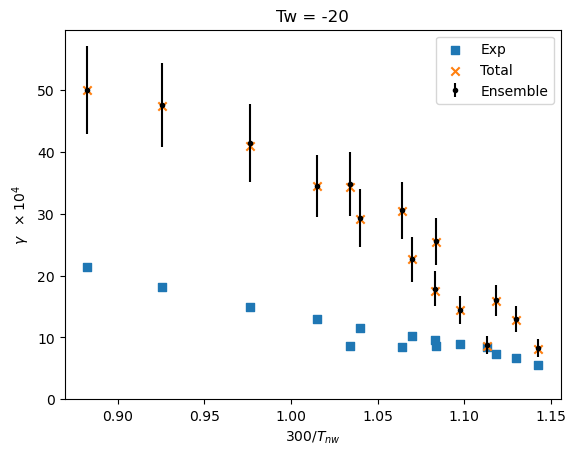

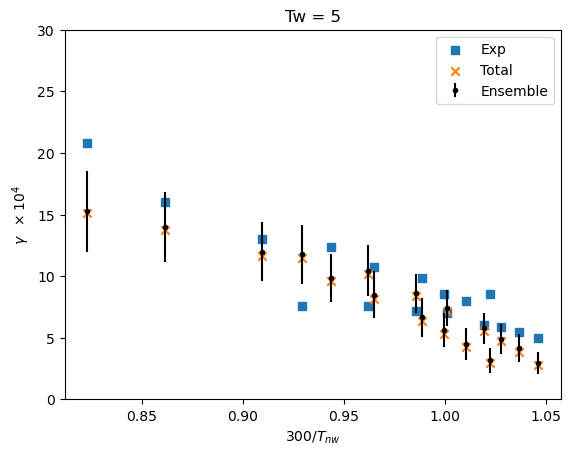

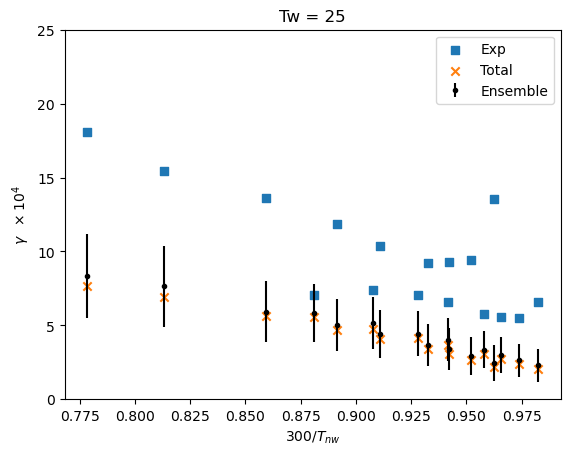

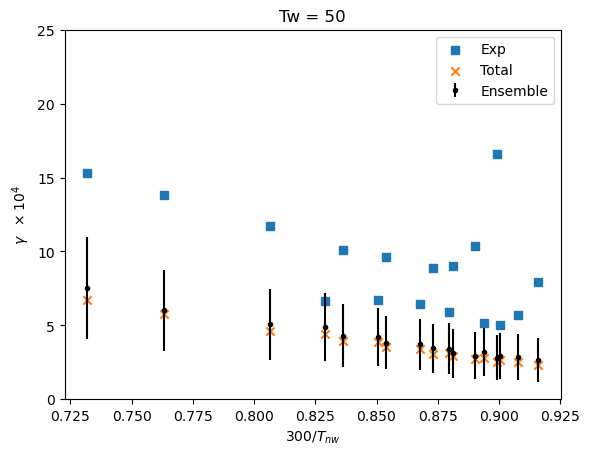

In [8]:
Tw_unique_values = np.unique(Tw_vec)


sum_value = 0

for value in Tw_unique_values:
    Tw = value
    indices = np.where((Tw_vec == Tw))[0]

    gammas_exp = gammas_exp_vec[indices]
    
    gammas_mean = mean_vector[indices]
    gammas_std = std_vector[indices]
    
    gammas_total_comp = gammas_data[indices]
    gammas_total = np.sum(gammas_total_comp, axis=1)
    
    Tnw = Tnw_vec[indices]
    print("pair: ", Tnw)
    x_vec = 300*np.reciprocal(Tnw)
    
    pressure = pressure_vec[indices]
    # plt.figure()
    fig, ax = plt.subplots()
    # ax.scatter(x_vec, gammas_mean*1e4, label='Model', marker=',', color='black')
    ax.errorbar(x_vec, gammas_mean*1e4, yerr=gammas_std*1e4, fmt='.', color="black", label='Ensemble')
    ax.scatter(x_vec, gammas_exp*1e4, label='Exp', marker='s')
    ax.scatter(x_vec, gammas_total*1e4, label='Total', marker='x')
    
    
    if Tw-273.15 == -20:
        ax.set_yticks(range(0, 51, 10))
        filename = 'Tw-20UpgMod.png'
    if Tw-273.15 == 5:
        ax.set_yticks(range(0, 31, 5))
        filename = 'Tw5UpgMod.png'
    if Tw-273.15 == 25:
        ax.set_yticks(range(0, 26, 5))
        filename = 'Tw25UpgMod.png'
    if Tw-273.15 == 50:
        ax.set_yticks(range(0, 26, 5))
        filename = 'Tw50UpgMod.png'
    
    # for i in range(gammas_data.shape[1]):
    #     plt.scatter(x_vec, gammas_total_comp[:, i], label=gammas_names[i], marker='.')
    
    # plt.grid()
    plt.xlabel(r"$300/T_{nw}$")
    plt.ylabel(r"$\gamma ~~ \times 10^4$")
    plt.title('Tw = %d' % (Tw-273.15))
    # plt.yscale('log')
    plt.legend()
    # plt.show()
    # plt.savefig("figures/"+filename)